In [80]:
import os
import numpy as np
import torch
from glob import glob
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from torchvision.models import vgg16_bn, VGG16_BN_Weights
from matplotlib import pyplot as plt

In [69]:
vgg16_bn_weights = VGG16_BN_Weights.DEFAULT
model = vgg16_bn(weights=vgg16_bn_weights)
transform = vgg16_bn_weights.transforms

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to C:\Users\Wakfu/.cache\torch\hub\checkpoints\vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [02:06<00:00, 4.37MB/s] 


In [118]:
def create_dataloaders(train_dir, valid_dir, test_dir, transform, batch_size, num_workers):
    
    # Use ImageFolder to create dataset(s)
    train_data = datasets.ImageFolder(train_dir, transform=transform)
    valid_data = datasets.ImageFolder(valid_dir, transform=transform)
    test_data = datasets.ImageFolder(test_dir, transform=transform)
    
    # Get class names
    class_names = train_data.classes
    
    # Turn images into data loaders
    training_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )
    
    validation_dataloader = DataLoader(
        valid_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )
    
    testing_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )
    
    return training_dataloader, testing_dataloader, class_names

In [117]:
path = 'data/'
types = ('*.jpg', '*.jpeg', '*.png')
files = []
for ext in types:
    f = glob(os.path.join(path, '*/'+ext))
    files += f
    
(files)

['data\\Cyclone\\0.jpg',
 'data\\Cyclone\\1.jpg',
 'data\\Cyclone\\10.jpg',
 'data\\Cyclone\\100.jpg',
 'data\\Cyclone\\101.jpg',
 'data\\Cyclone\\102.jpg',
 'data\\Cyclone\\103.jpg',
 'data\\Cyclone\\104.jpg',
 'data\\Cyclone\\105.jpg',
 'data\\Cyclone\\106.jpg',
 'data\\Cyclone\\107.jpg',
 'data\\Cyclone\\108.jpg',
 'data\\Cyclone\\109.jpg',
 'data\\Cyclone\\11.jpg',
 'data\\Cyclone\\110.jpg',
 'data\\Cyclone\\111.jpg',
 'data\\Cyclone\\112.jpg',
 'data\\Cyclone\\113.jpg',
 'data\\Cyclone\\114.jpg',
 'data\\Cyclone\\115.jpg',
 'data\\Cyclone\\116.jpg',
 'data\\Cyclone\\117.jpg',
 'data\\Cyclone\\118.jpg',
 'data\\Cyclone\\119.jpg',
 'data\\Cyclone\\12.jpg',
 'data\\Cyclone\\120.jpg',
 'data\\Cyclone\\121.jpg',
 'data\\Cyclone\\122.jpg',
 'data\\Cyclone\\123.jpg',
 'data\\Cyclone\\124.jpg',
 'data\\Cyclone\\125.jpg',
 'data\\Cyclone\\126.jpg',
 'data\\Cyclone\\127.jpg',
 'data\\Cyclone\\128.jpg',
 'data\\Cyclone\\129.jpg',
 'data\\Cyclone\\13.jpg',
 'data\\Cyclone\\130.jpg',
 'data\\C

In [119]:
os.mkdir(os.path.join(path, 'train'))
os.mkdir(os.path.join(path, 'valid'))
os.mkdir(os.path.join(path, 'test'))

In [120]:
rand_shuffle = np.random.permutation(len(files))

In [121]:
for _f in ['train', 'valid', 'test']:
    for _fold in os.listdir(path):
        os.mkdir(os.path.join(path, _f, _fold))

In [122]:
len(rand_shuffle)

4428

In [123]:
(len(files)*0.2)

885.6

In [124]:
for n in rand_shuffle[:88]:
    folder = files[n].split('\\')[1]
    name = files[n].split('\\')[-1]
    os.rename(files[n], os.path.join(path, 'valid', folder, name))

In [125]:
for n in rand_shuffle[88:700]:
    folder = files[n].split('\\')[1]
    name = files[n].split('\\')[-1]
    os.rename(files[n], os.path.join(path, 'test', folder, name))

In [127]:
for n in rand_shuffle[700:]:
    folder = files[n].split('\\')[1]
    name = files[n].split('\\')[-1]
    os.rename(files[n], os.path.join(path, 'train', folder, name))

In [128]:
os.rmdir('data/train/train')
os.rmdir('data/train/test')
os.rmdir('data/test/test')
os.rmdir('data/test/train')
os.rmdir('data/valid/test')
os.rmdir('data/valid/train')
os.rmdir('data/test/valid')
os.rmdir('data/train/valid')
os.rmdir('data/valid/valid')

In [129]:
train_dir = 'data/train'
valid_dir = 'data/valid/'
test_dir = 'data/test'

In [130]:
training_dataloader, testing_dataloader, class_names = create_dataloaders(train_dir=train_dir, test_dir=test_dir, valid_dir=valid_dir, batch_size=16, num_workers=os.cpu_count(), transform=transform)

In [131]:
print(class_names)

['Cyclone', 'Earthquake', 'Flood', 'Wildfire']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


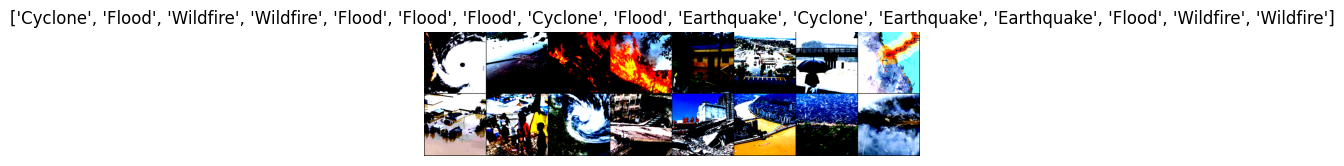

In [132]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(training_dataloader))
show_databatch(inputs, classes)

In [70]:
for params in model.features.parameters():
    params.requires_grad=False


num_features = model.classifier[6].in_features
features = list(model.classifier.children())[:-1]
features.extend([nn.Linear(num_features, len(class_names))])
model.classifier = nn.Sequential(*features)

In [71]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [72]:
from ast import Dict, List, Tuple


def training_step(model: torch.nn.Module,
                  dataloader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  optimizer: torch.optim.Optimizer):
    model.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.cuda(), y.cuda()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.cpu().item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):

    model.eval() 
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.cuda(), y.cuda()
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.cpu().item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int):
  
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    model.cuda()

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = training_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn)

        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [73]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001, momentum=0.9)

results = train(model=model, 
                       train_dataloader=training_dataloader,
                       test_dataloader=testing_dataloader, 
                       epochs=20, 
                       loss_fn=loss_fn, 
                       optimizer=optimizer)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3053 | train_acc: 0.8948 | test_loss: 0.1118 | test_acc: 0.9674
Epoch: 2 | train_loss: 0.1699 | train_acc: 0.9415 | test_loss: 0.0986 | test_acc: 0.9629
Epoch: 3 | train_loss: 0.1249 | train_acc: 0.9540 | test_loss: 0.1104 | test_acc: 0.9629
Epoch: 4 | train_loss: 0.0968 | train_acc: 0.9670 | test_loss: 0.0835 | test_acc: 0.9629
Epoch: 5 | train_loss: 0.0825 | train_acc: 0.9702 | test_loss: 0.0734 | test_acc: 0.9719
Epoch: 6 | train_loss: 0.0587 | train_acc: 0.9815 | test_loss: 0.0724 | test_acc: 0.9652
Epoch: 7 | train_loss: 0.0565 | train_acc: 0.9778 | test_loss: 0.0642 | test_acc: 0.9732
Epoch: 8 | train_loss: 0.0474 | train_acc: 0.9840 | test_loss: 0.0781 | test_acc: 0.9719
Epoch: 9 | train_loss: 0.0398 | train_acc: 0.9862 | test_loss: 0.0757 | test_acc: 0.9696
Epoch: 10 | train_loss: 0.0297 | train_acc: 0.9910 | test_loss: 0.0795 | test_acc: 0.9696
Epoch: 11 | train_loss: 0.0504 | train_acc: 0.9888 | test_loss: 0.0825 | test_acc: 0.9754
Epoch: 12 | train_l

In [75]:
from matplotlib import pyplot as plt


def plot_loss_curves(results):

    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


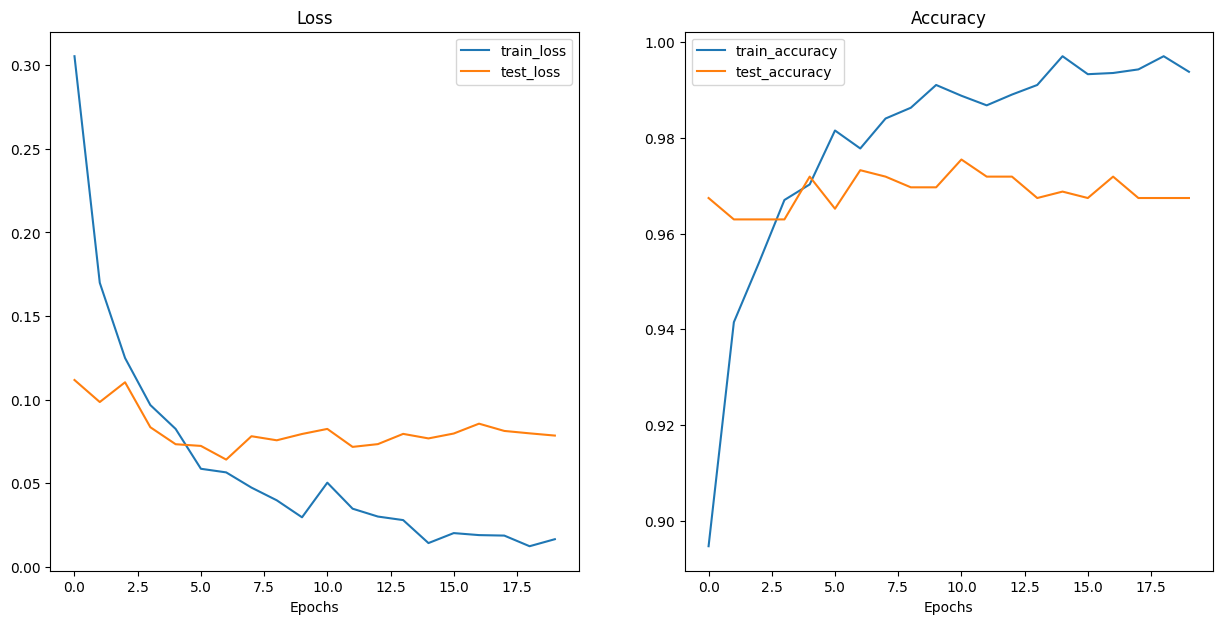

In [77]:
plot_loss_curves(results=results)

In [88]:
def visualize_model(vgg, num_images=6):
    was_training = vgg.training
    
    # Set model for evaluation
    vgg.train(False)
    vgg.eval() 
    
    images_so_far = 0

    for i, data in enumerate(testing_dataloader):
        inputs, labels = data
        size = inputs.size()[0]
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        else:
            inputs, labels = inputs, labels
        
        outputs = vgg(inputs)
        
        _, preds = torch.max(outputs.data, 1)
        predicted_labels = [preds[j] for j in range(inputs.size()[0])]
        
        print("Ground truth:")
        show_databatch(inputs.data.cpu(), labels.data.cpu())
        print("Prediction:")
        show_databatch(inputs.data.cpu(), predicted_labels)
        
        del inputs, labels, outputs, preds, predicted_labels
        torch.cuda.empty_cache()
        
        images_so_far += size
        if images_so_far >= num_images:
            break
        
    vgg.train(mode=was_training)

Ground truth:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


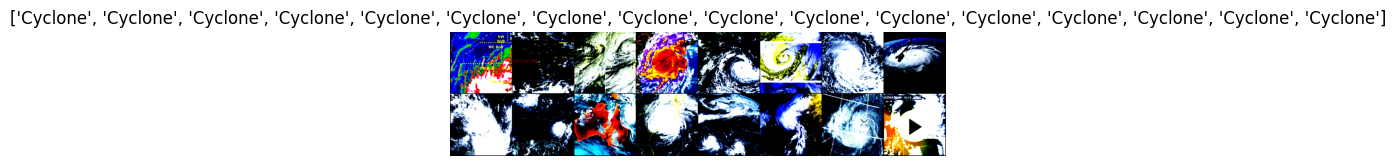

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction:


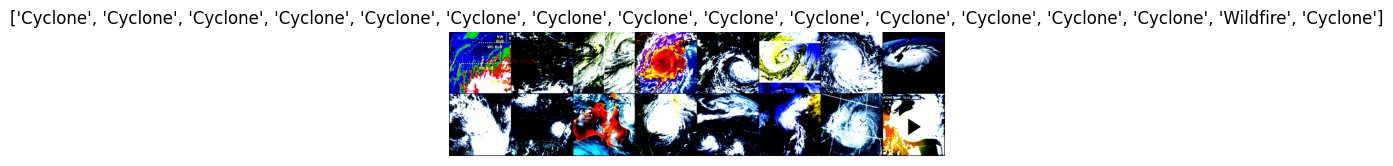

In [90]:
visualize_model(model)